![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [47]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [48]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB


**Preprocessing the dataset**

In [49]:
#using get dummies from pandas to change the categorical feature from the dataset
penguins_df = pd.get_dummies(penguins_df,drop_first= True,dtype= int)
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,1


In [50]:
#standardizing the data
scaler =  StandardScaler()
temp = scaler.fit_transform(penguins_df)
penguins_scaled = pd.DataFrame(data = temp,columns=penguins_df.columns)
penguins_scaled.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


**Conducting Elbow Analysis to find the optimal number of clusters for k-means clustering**

In [51]:
#using inertia of the model to determine the number of clusters
import numpy as np
x = np.arange(1,11)
inertia = [] 

# initiating a loop from 1 to 10 for clusters
for i in x:
    model = KMeans(n_clusters= i)
    model.fit(penguins_scaled)
    inertia.append(model.inertia_)
print(inertia) 

[1659.9999999999995, 881.8305702961084, 576.2691239087537, 383.46432033536416, 282.84171477880295, 215.9510467634977, 199.56711770523657, 183.63705084204287, 171.18626281720123, 162.25200200132258]


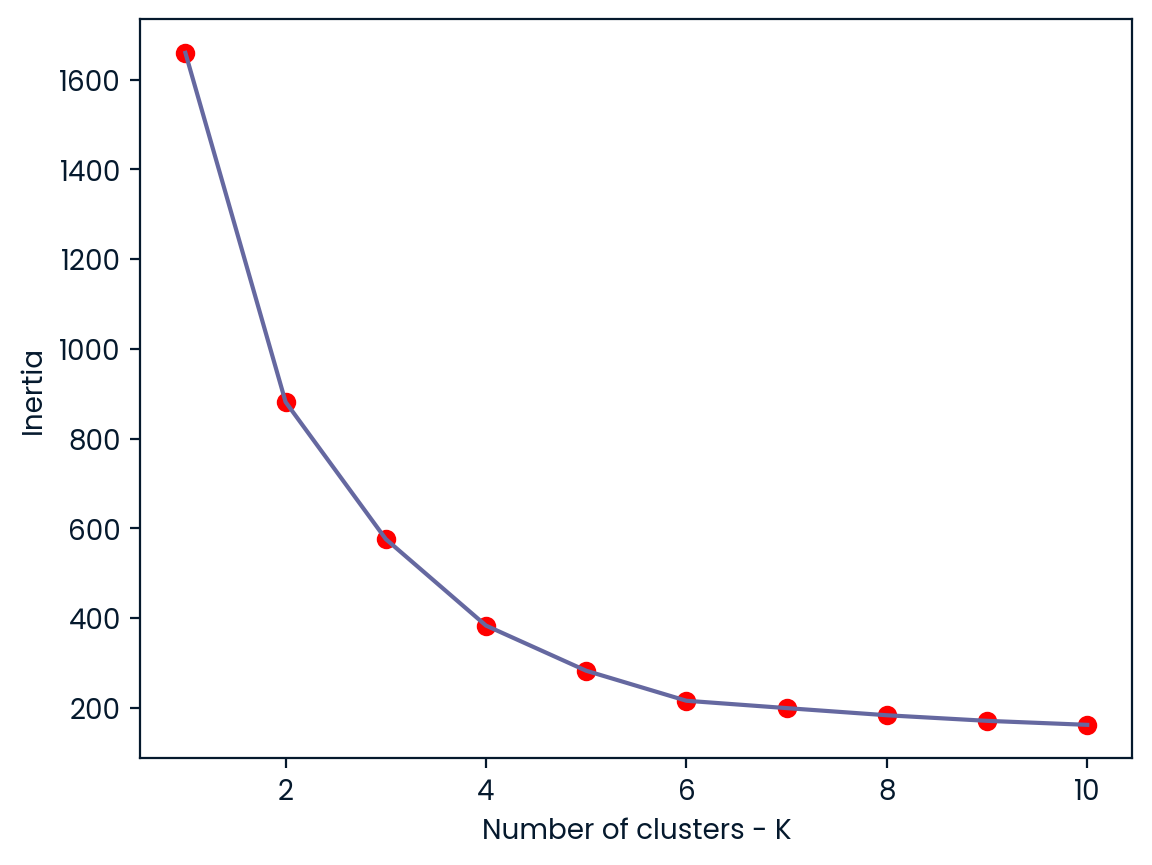

In [52]:
#plotting the inertia vs number of clusters
plt.plot(x,inertia)
plt.scatter(x,inertia,color = "red")
plt.xlabel("Number of clusters - K")
plt.ylabel("Inertia")
plt.show()

Based on the above graph we can see that k = 4 is a good choice

**Performing the k-means clustering on the dataset using k = 4**

In [53]:
#kmeans clustering
model = KMeans(n_clusters = 4, random_state= 42)
model.fit(penguins_scaled)
penguins_df["label"] = model.labels_
print(penguins_df["label"])

0      0
1      2
2      2
3      2
4      0
      ..
327    1
328    1
329    3
330    1
331    3
Name: label, Length: 332, dtype: int32


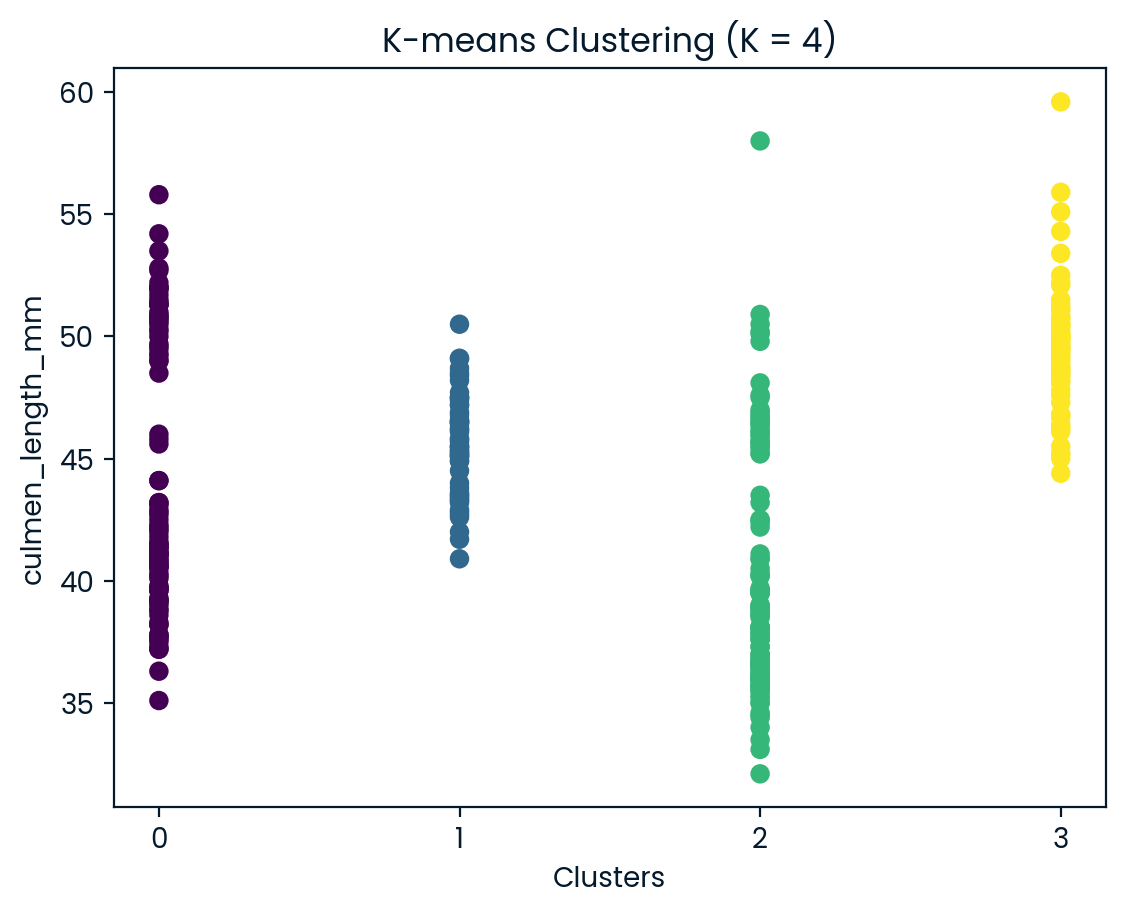

In [54]:
#visualizing the clusters
plt.scatter(penguins_df["label"],penguins_df["culmen_length_mm"], c=model.labels_,cmap = "viridis")
plt.xlabel("Clusters")
plt.ylabel("culmen_length_mm")
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title("K-means Clustering (K = 4)")
plt.show()

**Creating the final characteristic table for each cluster**

In [55]:
numeric_columns = ["culmen_length_mm","culmen_depth_mm","flipper_length_mm","label"]
stat_penguins = penguins_df[numeric_columns].groupby("label").mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,43.878302,19.111321,194.764151
1,45.563793,14.237931,212.706897
2,40.217757,17.611215,189.046729
3,49.473770,15.718033,221.540984
